In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
customers_df = pd.read_csv("Customers.csv")
products_df = pd.read_csv("Products.csv")
transactions_df = pd.read_csv("Transactions.csv")

In [4]:
customers_df.dropna(inplace=True)  # Remove rows with missing values
products_df.drop_duplicates(inplace=True)  # Remove duplicate rows


In [6]:
# Convert 'SignupDate' to datetime format
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])


In [9]:
# Merge datasets for analysis
merged_df = pd.merge(transactions_df, customers_df, on='CustomerID')
merged_df = pd.merge(merged_df, products_df, on='ProductID')
print(merged_df.head()) 

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker  Elec

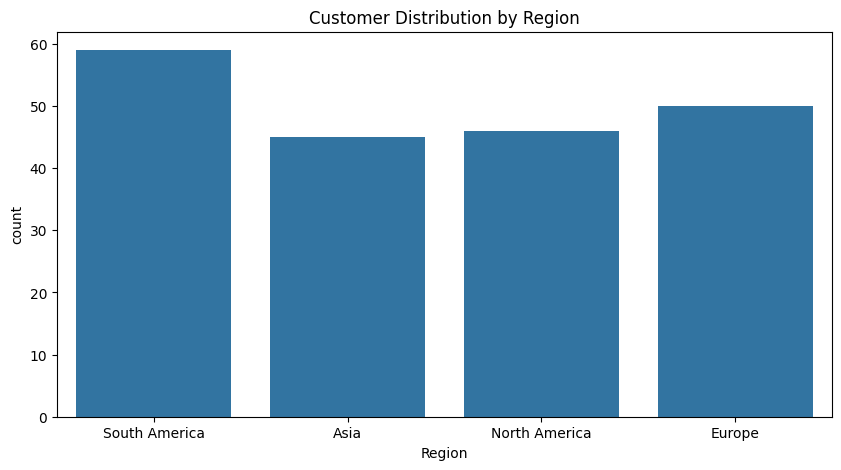

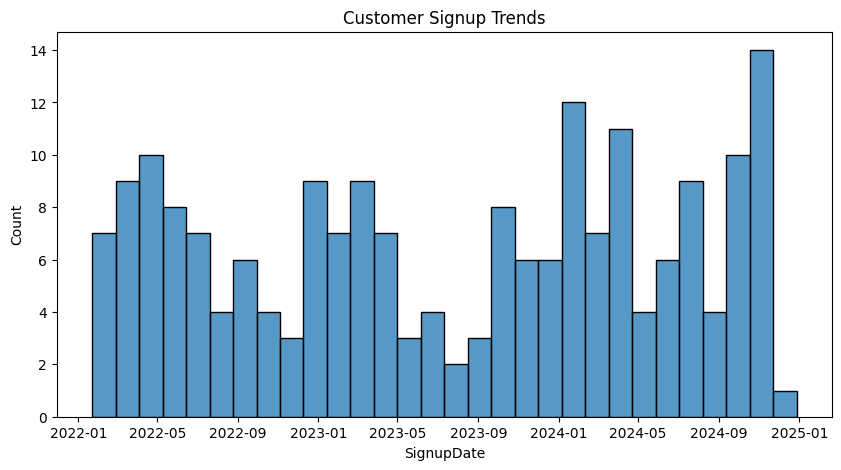

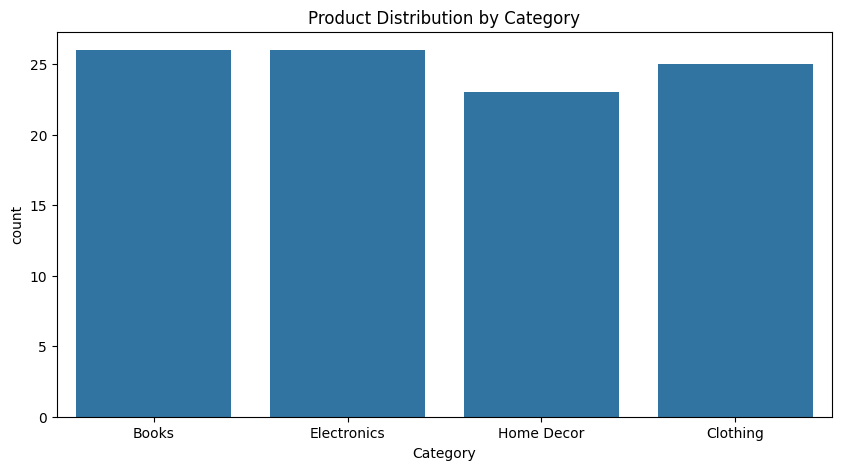

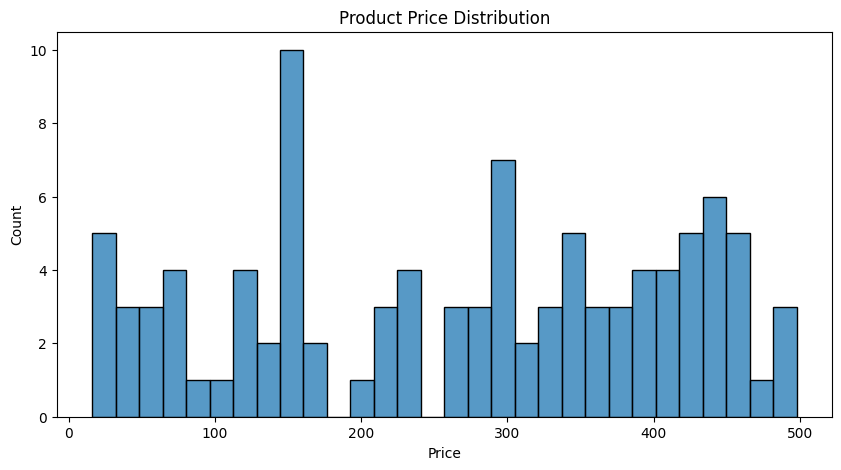

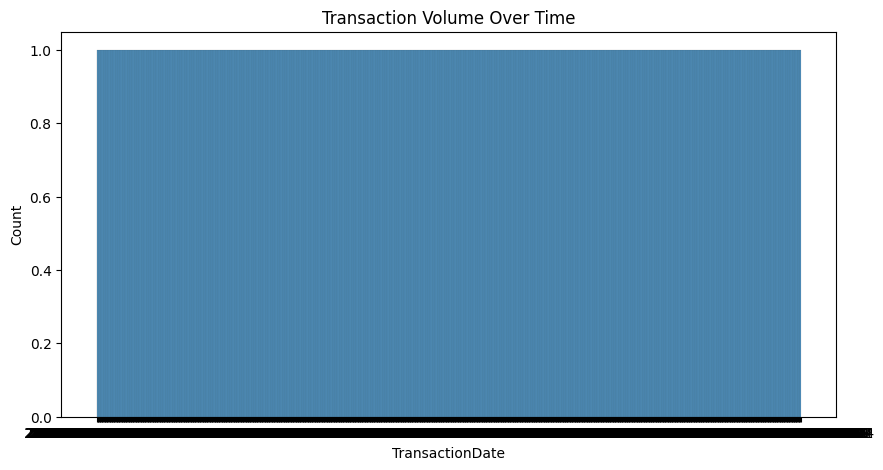

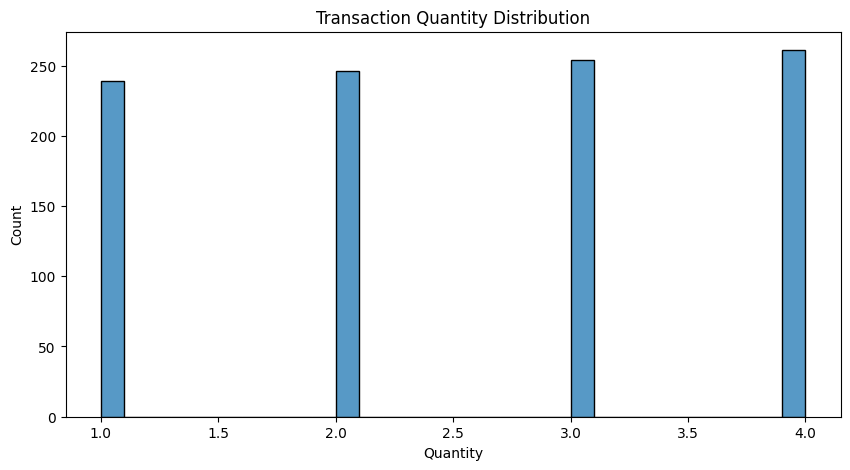

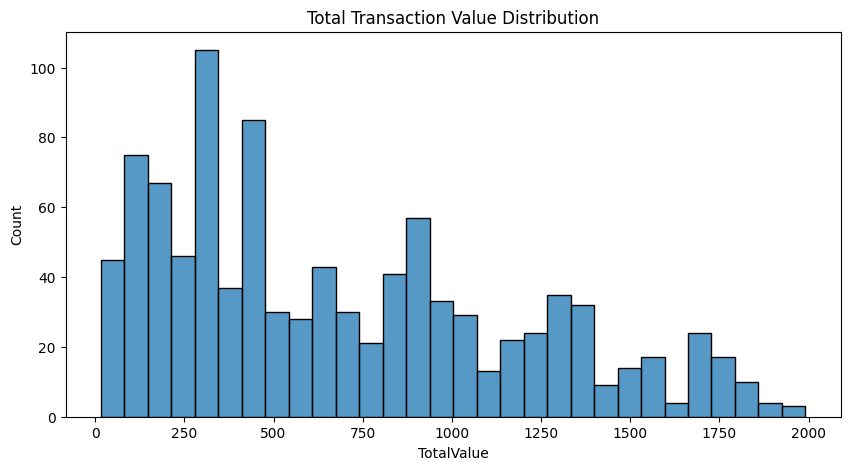

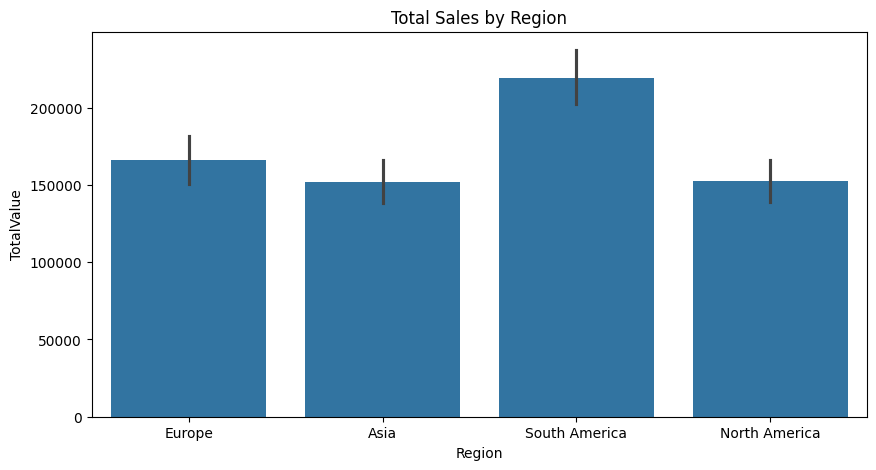

In [10]:
# EDA and Visualization

# Customer Analysis
plt.figure(figsize=(10, 5))
sns.countplot(x='Region', data=customers_df)
plt.title('Customer Distribution by Region')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(x='SignupDate', data=customers_df, bins=30)
plt.title('Customer Signup Trends')
plt.show()

# Product Analysis
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=products_df)
plt.title('Product Distribution by Category')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(x='Price', data=products_df, bins=30)
plt.title('Product Price Distribution')
plt.show()

# Transaction Analysis
plt.figure(figsize=(10, 5))
sns.histplot(x='TransactionDate', data=transactions_df, bins=30)
plt.title('Transaction Volume Over Time')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(x='Quantity', data=transactions_df, bins=30)
plt.title('Transaction Quantity Distribution')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(x='TotalValue', data=transactions_df, bins=30)
plt.title('Total Transaction Value Distribution')
plt.show()

# Bivariate Analysis and Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='TotalValue', data=merged_df, estimator=sum)
plt.title('Total Sales by Region')
plt.show()